In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2025-08-04 11:12:40.711952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754286160.724487  278324 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754286160.728424  278324 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754286160.739614  278324 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754286160.739626  278324 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754286160.739627  278324 computation_placer.cc:177] computation placer alr

In [35]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_dist = [0]*10
for x in y_train:
    class_dist[x]+=1
class_dist

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

In [36]:
x_train = np.expand_dims(x_train,-1)

In [52]:
y_train[1]

0

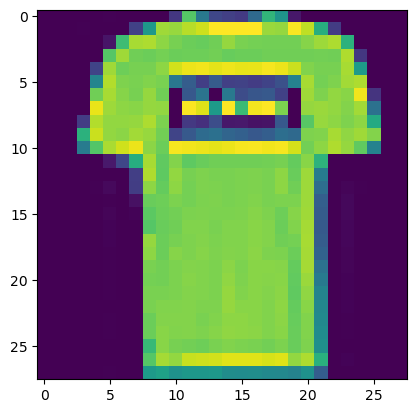

In [5]:
plt.imshow(x_train[1])

In [6]:
MobileNetV2 = tf.keras.applications.MobileNetV2(
    input_shape=(96,96,3),
    alpha=1.0,
    include_top=False,
    weights='imagenet',
)

2025-08-04 11:12:47.280780: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-08-04 11:12:47.280809: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-08-04 11:12:47.280814: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: garvthakral-ROG-Zephyrus-G15-GA503RM
2025-08-04 11:12:47.280817: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: garvthakral-ROG-Zephyrus-G15-GA503RM
2025-08-04 11:12:47.280927: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 570.133.7
2025-08-04 11:12:47.280941: I external/local_xla/xla/stream_executor/cuda/cuda_diagn

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [58]:
def preprocess(image,labels):
    image = tf.image.grayscale_to_rgb(image)/255
    image = tf.image.resize_with_pad(
        image,
        96,
        96,
    )
    labels = tf.one_hot(labels,depth = 10)
    return image,labels

In [65]:
tf_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))

In [ ]:
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test))

In [66]:
tf_ds = tf_ds.map(preprocess)
tf_ds = tf_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
test_ds = test_ds.map(preprocess)
test_ds = test_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [61]:
for x in tf_ds.take(1):
    print(x[0].shape)

(96, 96, 3)


In [77]:
for layer in MobileNetV2.layers:
    # layer.trainable = False
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=Conv1, built=True>
<BatchNormalization name=bn_Conv1, built=True>
<ReLU name=Conv1_relu, built=True>
<DepthwiseConv2D name=expanded_conv_depthwise, built=True>
<BatchNormalization name=expanded_conv_depthwise_BN, built=True>
<ReLU name=expanded_conv_depthwise_relu, built=True>
<Conv2D name=expanded_conv_project, built=True>
<BatchNormalization name=expanded_conv_project_BN, built=True>
<Conv2D name=block_1_expand, built=True>
<BatchNormalization name=block_1_expand_BN, built=True>
<ReLU name=block_1_expand_relu, built=True>
<ZeroPadding2D name=block_1_pad, built=True>
<DepthwiseConv2D name=block_1_depthwise, built=True>
<BatchNormalization name=block_1_depthwise_BN, built=True>
<ReLU name=block_1_depthwise_relu, built=True>
<Conv2D name=block_1_project, built=True>
<BatchNormalization name=block_1_project_BN, built=True>
<Conv2D name=block_2_expand, built=True>
<BatchNormalization name=block_2_expand_BN, built=True>
<ReLU name=bloc

In [82]:
X = MobileNetV2.output
X = tf.keras.layers.GlobalAveragePooling2D()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)   # optional intermediate layer
outputs = tf.keras.layers.Dense(10, activation='softmax')(X)  # for 10 classes like CIFAR10/FashionMNIST

# Create new model
model = tf.keras.Model(inputs=MobileNetV2.input, outputs=outputs)

In [83]:
model.compile(optimizer = "adam",loss = tf.keras.losses.CategoricalCrossentropy(),metrics = ["accuracy"])

In [ ]:
model.fit(tf_ds,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.8365 - loss: 0.4574
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.8965 - loss: 0.2800
Epoch 3/10
1604/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.9075 - loss: 0.2442

In [ ]:
model.eval(test_ds)